# PMI Use case: Turnover Analysis
***

>**If you are not a people-forward organization and you lack understanding of employee needs, you run the risk of not being a successful business. In a world where the real fight is over people – attracting and retaining the right talent – employee engagement is not a nice-to-have, it is a must.** -Kasper Hulthin (Peakon's Chief Growth Officer)

## Introduction
This use case is part two of two assessment challenges for the Data Science Lead position for PMI.

For this data science challenge, a Microsoft Excel Open XML Spreadsheet (\*.xlsx) file containing people information was sent via email.

##### Use case
The CHRO has asked the Head of Talent Management to **devise a retention strategy to make sure we
retain our top talent**.  

The goal is to do a quick deep dive into our turnover data for the last 12 months to understand...   
**Are we losing top talent?**  
And, if so, **why and how can we retain our current top talent?**

*Please Note: all employee data contained in the assessment is automatically generated and does not
contain any linkage or relationship with PMI actual employee data. All reward, talent and salary data
is not indicative or PMI employee compensation amounts, talent review processes or survey
sentiment.*

##### The Data
Feature | Description |
--- | :- |
Employee ID | Unique identifier for employee |
Tenure | Time in company measured in years |
Grade | Seniority measure in Hay Grades |
Comp Ratio | Compensation ratio: an indidivuals pay rate relative to the midpoint in the salary range. Calculated dividing annual salary by the midpoint of the salary range.  |
Cont. Hours | Contracted hours (hrs): full time employees contracted for 35 hours per week |
Annual Salary | Pro Rata total base pay, not including bonuses or shares |
Hourly Rate | hourly rate of pay  |
Actual monthly pay | Take home salary (after tax) |
Time in latest role | time since last promotion or lateral move (years) |
Commute | Distance in miles between home address and office location (as eagle flies) |
Direct Reports | Number of employees reporting directly to manager |
Is manager | Boolean Manager: 1 = is people manager, 0 = no management responsibility |
eNPS Score | From survey: Employee net promoter score response (measured on 10 point scale) |
Well-being survey score | From survey: Please rate your emotional and psycholigical well-being |
Career opportuntities Survey score | From survey: My manager and I have meaningful conversations about career opportunities |
Recognition Survey score | From survey: I feel rightly recognised for my performance |
Line manager rating survey score | From survey: My manager enables me to be successful in my role |
Country | Georgraphic location of employee |
Function | Division/Department employee is in |
Employee Group | Type of contract employee has |
Gender | Gender of employee |
Nationality | Nationality of employee  |
Race | Ethnicity of employee |
Sexuality | Sexual prefference of employee |
Talent Planning | Outcome of talent review. High potential signifies employee has potentiall and high performance and are priorities to retain |
Leaver | Boolean value: 0 = current employee, 1 = voluntary leaver |


Survey Scale: | eNPS | Well-being | Career, Recognition, LM|
:-: | :-: | :-: | :-: |
- |  | Denotes did not fill in the employee survey |
1 |	Detractor |	Very poor |	Strongly Disagree |
2 |	Detractor |	Poor | Disagree |
3 |	Detractor |	Neutral | Neither agree or disagree |
4 | Detractor | Good | Agree |
5 | Detractor | Very Good | Strongly Agree |
6 | Detractor |
7 | Passive |
8 | Passive |
9 | Promoter |
10 | Promoter |





## Sections

[Initial Exploratory Analysis](#Initial-Exploratory-Data-Analysis)  
[Data Wrangling](#Data-Wrangling)  

## Answers
[Calculate potential yearly reduction in CO2 emissions of cabs without passengers](#CO2-Savings)  
__[Next Fare Predictor](http://localhost:8888/notebooks/PMI/notebooks/cabspotting/Next%20Fare%20Predictor.ipynb#Next-Fare-Predictor)__



According to a talent management article on Harvard Business Review website, "*On Average, **15%** of a company's workforce - roughly one in seven employees - are A players or "stars"*" (Michael Mankins, 2017) <a name="Hardvard Business Review"></a>[<sup>[1]</sup>](https://hbr.org/2017/02/the-best-companies-dont-have-more-stars-they-cluster-them-together)


In [1]:
# change main root dir
%cd ..\..

D:\Projects\CondaAnalyses\PMI


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import gc

In [3]:
data_path = 'data_checkpoints/usecase_people/'

flatui = ["#9225a5", "#82c7a5", "#0145ac", "#eece1a", "#f4d6ad", "#f15e22"]
sns.set_style(
    "darkgrid",
    {

        "grid.linestyle": ":",
        'axes.facecolor':'#1B212C'
    }
)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

In [4]:
df =  pd.read_excel(
    './turnoverdata/Data assessement - Data Science Lead.xlsx',
    sheet_name=0,
    engine='openpyxl')

## Initial Exploratory Data Analysis
***

A first view of a sample row is taken to assess the first state of the Dataset

In [5]:
df.sample(1).T

,461
Employee ID,462
Tenure,5.63886
Grade,3
Comp Ratio,1.09
Cont. Hours,35
Annual Salary,11445.0
Hourly Rate,6.288462
Actual monthly pay,220.096154
Time in latest role,1.1
Commute,7.2


Working with column names that have special characters, spaces and a mix of lower and upper case letters can be difficult.
As a first step, renaming columns to lower case separated by underscores is taken.

In [6]:
names = [ '_'.join(col.lower().split(' ')).replace(".", '').replace('-','_') for col in df.columns] 
df.columns = names
df.rename(columns = {
    'actual_monthly_pay':'actual_weekly_pay',
    'career_opportuntities_survey_score': 'career_opportunities_survey_score'}, inplace = True)
df.head(1)

,employee_id,tenure,grade,comp_ratio,cont_hours,annual_salary,hourly_rate,actual_weekly_pay,time_in_latest_role,commute,...,line_manager_rating_survey_score,country,function,employee_group,gender,nationality,race,sexuality,talent_planning,leaver
0,1,6.465675,5,0.86,35,13760.0,7.56044,264.615385,6.465675,5.7,...,4,Indonesia,Other,Standard,Female,Indonesia,Asian,Heterosexual,Other,True


From the Data Frame initial description, it is evident that there are some inconsistencies with the supplied information.

⚠️ "Tenure" and "Time in latest role" have negative values  
⚠️ Max "Tenure" and "Time in latest role" are above 90 years whereas realistically a maximum values of 50 years should be addressed
⚠️ "Actual monthly pay" seems to fit the description and values of week's worth pay

Since there are negative values in the dataset where only positive numbers are acceptable there are two options:  
1. Filter out the information that has negative values for tenure and time in latest role
2. Treat and modify the information as absolute values  

💡 Assumption - Negative values for "Tenure and "Time in latest role" are removed from the dataset  
💡 Assumption - A maximum tenure of 50 years

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,7180.0,3590.500000,2072.831799,1.000000,1795.750000,3590.500000,5385.250000,7180.000000
tenure,7180.0,7.487933,9.042166,-9.980000,5.799376,6.215295,6.649385,97.960000
grade,7180.0,9.285515,4.558403,1.000000,6.000000,9.000000,12.000000,23.000000
comp_ratio,7180.0,1.003787,0.146908,0.750000,0.880000,1.000000,1.130000,1.250000
cont_hours,7180.0,33.769638,3.862863,14.000000,35.000000,35.000000,35.000000,35.000000
annual_salary,7180.0,24872.550836,10111.175973,6375.000000,17920.000000,23700.500000,30847.000000,65596.000000
hourly_rate,7180.0,13.666237,5.555591,3.502747,9.846154,13.022253,16.948901,36.041758
actual_weekly_pay,7180.0,430.782437,195.935355,51.653846,286.153846,409.538462,549.875000,1261.461538
time_in_latest_role,7180.0,5.950961,10.293066,-4.760000,1.800000,5.600000,6.400000,98.960000
commute,7180.0,18.398315,10.696403,0.000000,9.300000,18.200000,27.700000,36.700000


In [8]:
# first data cleanup
# tenure and time in latest role between 0 and 50
df = df[(
    df['tenure'].between(0,50, inclusive="both")
    & df['time_in_latest_role'].between(0,50,inclusive="both")
)]

From the data frame info, it is observable that the following features are treated as categorical:
- country
- function
- employee_group
- gender
- nationality
- race
- sexuality
- talent_planning

Moreover, certain categories are wrongly assessed. Here are the following remarks: 

feature | remark |
:-- | :-: |
⚠️ country | *Monrovia* is the capital city of *Liberia*, not a country |
⚠️ nationality | since *Monrovia* is not a country but a city the correct nationality should be *Liberia* |
⚠️ race | There are two values which should be the same for *White* and *white* |
⚠️ sexuality | Minor typo on *Non-hetersexual* value should be *Non-heterosexual* |

This will need to be transformed to numerical values (depending on the solution approach) to enable the use of machine learning algorithms.


In [9]:
# Print all datatypes and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)+' : '+str(df[column].unique()))
        print(df[column].value_counts())
        print('___________________________________________')

country : ['Indonesia' 'Other' 'Russian Fed.' 'Brazil' 'Switzerland' 'Japan'
 'Philippines' 'Turkey' 'Germany' 'Romania' 'Monrovia' 'Poland' 'Pakistan'
 'Ukraine' 'Italy' 'Mexico' 'Argentina' 'South Korea']
Indonesia       1903
Other            897
Philippines      733
Poland           540
Russian Fed.     343
Switzerland      288
Argentina        265
Brazil           252
Germany          242
Japan            225
Italy            217
Turkey           213
Monrovia         156
Romania          155
Pakistan         150
Ukraine          143
Mexico           139
South Korea      125
Name: country, dtype: int64
___________________________________________
function : ['Other' 'Sales' 'Operations' 'Finance' 'People & Culture'
 'Information Services' 'Marketing' 'Science & Innovation'
 'External Affairs' 'Support Services']
Operations              2720
Sales                   1646
Other                    744
Finance                  530
Marketing                393
Science & Innovation     251


## Data Wrangling & Initial EDA
***

Starting by correcting the mistakes the data has presented

In [10]:
# wrangle Monrovia -> Liberia on country
df['country'] = df['country'].apply(
    lambda country: "Liberia" if country == "Monrovia" else country
)

# wrangle Monrovia -> Liberia on nationality
df['nationality'] = df['nationality'].apply(
    lambda country: "Liberia" if country == "Monrovia" else country
)

# wrangle white -> White on race
df['race'] = df['race'].apply(
    lambda race: "White" if race == "white" else race
)

# wrangle Non-hetersexual -> Non-heterosexual on sexuality
df['sexuality'] = df['sexuality'].apply(
    lambda sexuality: "Non-heterosexual" if sexuality == "Non-hetersexual" else sexuality
)

From the initial assessment of the information there are no significant correlations.

Some relationships are appreciated:
- Grade -> Annual Salary, Hourly Rate, Actual weekly pay
- Is Manager -> Direct Reports
- Tenure -> Time in latest Role

Since *Correlation* is a statistical tool that is a measure of the degree of relationship between two different functions, a high correlation ( close to 1 ) means that the values tend to affect each other (When one changes the other changes in the same direction). On the other hand, negative correlation means that one value decreases as the other one increases (The bigger one value is, the smaller the other one is).

Pearson correlation coefficient (r) value | Strength | Direction |
:-:|:-:|:-:|
r > 0.5 | Strong | Positive |
0.5 > r > 0.3 | Moderate |Positive |
0.3 > r > 0 | Weak | Positive |
0 | None | None |
0 > r > -0.3 | Weak | Negative |
-0.3 > r > -0.5 | Moderate | Negative |
-0.5 > r | Strong | Negative 

*Pearson Correlation Coefficient*  
\$ r = \frac{ n\sum{xy}-(\sum{x})(\sum{y})}{\sqrt{[n\sum{x^2}-(\sum{x})^2][n\sum{y^2}-(\sum{y})^2]}}$

<AxesSubplot:>

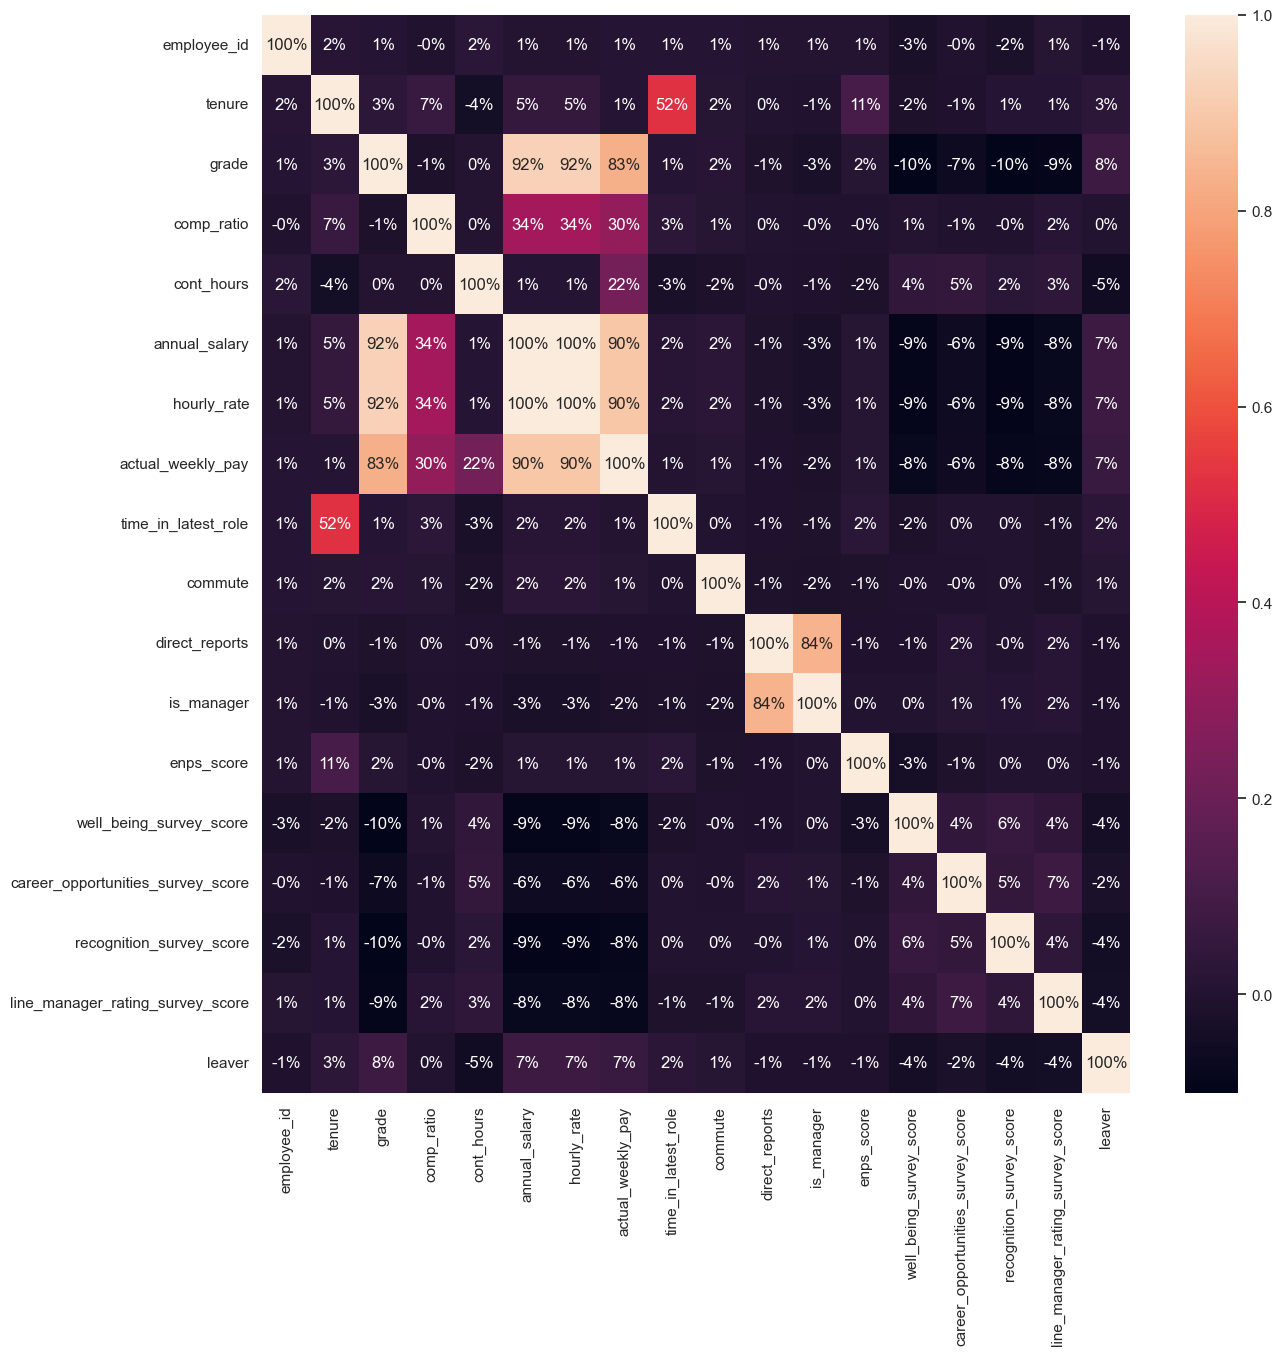

In [11]:
# Draw the heatmap to assess immediate correlations of data.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

On first sight, there are no significant correlations in the data.

The strongest correlations happen on indisputable covariants such as:
- Tenure -> Time in latest role
- Grade ->  Annual Salary, Hourly Rate, Actual Monthly Pay
- Compensation Ratio -> Annual Salary, Hourly Rate, Actual Monthly Pay
- Contracted Hours -> Actual Monthly Pay
- Country -> Nationality, Race

Following a Forbes<a name="why-tenure-matters-for-employee-engagement"></a>[<sup>[2]</sup>](https://www.forbes.com/sites/hvmacarthur/2019/09/25/why-tenure-matters-for-employee-engagement/) article on "*Why tenure matter for employee engagement*"  the following tenure categories are taken into account for a better breakdown of the possible employee confidence and energy attributes

Tenure Category | Tenure time | Confidence level | Energy level | Remarks | Tip |
:-:|:-:|:-:|:-:|:-:|:-:|
new | 1-3M | lowest | highest | High excitement and curiosity. Optimism is also high. | Provide more support and traning and take viewpoint into account
acquainted | 3M-1Y | low | high | Looking for more freedom of expresion | Ask how they want to make an impact and enable them as long as it fits compnay goals
engaged | 1-2 Years | mid | mid | Most engaged | Ensure support and be open to changes they identify as opportunities
mastered | 2-5Y | high | mid | Most got mastery, looking for broader leadership roles | Keep them well tested, expose them to broader network and development on skills for next role
tested | 5-10Y | highest | low | They either grow and expand or fade out. Many explore career changes | Change of functions and transfer skills 
loyal | 10+Y | highest | lowest | High loyalty | Give them opportunity to express themselves and contribute to future success



In [12]:
# bin tenure to fit categories

def bin_tenure(val):
    if val <= 0.25:
        return "new"
    elif val <= 1:
        return "acquainted"
    elif val <= 2:
        return "engaged"
    elif val <= 5:
        return "mastered"
    elif val <= 10:
        return "tested"
    elif val > 10:
        return "loyal"
    else:
        return "error"
    
df['tenure_bin'] = df['tenure'].apply(lambda tenure: bin_tenure(tenure))

Compensation ratio can also be fitted into the following categories:

compensation ratio | value |
:-- | :-: |
less than 1 | fraction |
exactly one | whole |
more than 1 | multiple |

In [13]:
# bin compensation ratio

def bin_compensation_ratio(val):
    if val < 1:
        return "fraction"
    elif val == 1:
        return "whole"
    elif val > 1:
        return "multiple"
    else:
        return "error"
    
df['comp_ratio_bin'] = df['comp_ratio'].apply(lambda tenure: bin_compensation_ratio(tenure))

In [14]:
# bin contracted hours
df['cont_hours_bin'] = df['cont_hours'].apply(lambda cont_hours: "full-time" if cont_hours==35 else "half-time")

In [15]:
# bin annual salary
salary_bins = [0, 10000.00, 20000.00, 30000.00, 40000.00, 50000.00, 60000.00, 70000.00]
df['annual_salary_bin'] = pd.cut(df['annual_salary'], salary_bins)

In [16]:
# bin grade
grade_bins = [0, 5, 10, 15, 20, 25]
df['grade_bin'] = pd.cut(df['grade'], grade_bins)

In [17]:
# Print all categorical data their mappings
for column in df.columns: 
    if df[column].dtype == object:
        print(column)
        print(dict(enumerate(df[column].astype('category').cat.categories)))
        print('________________________________________________________________')
    if df[column].dtype == "category":
        print(column)
        print(dict(enumerate(df[column].cat.categories)))
        print('________________________________________________________________')

country
{0: 'Argentina', 1: 'Brazil', 2: 'Germany', 3: 'Indonesia', 4: 'Italy', 5: 'Japan', 6: 'Liberia', 7: 'Mexico', 8: 'Other', 9: 'Pakistan', 10: 'Philippines', 11: 'Poland', 12: 'Romania', 13: 'Russian Fed.', 14: 'South Korea', 15: 'Switzerland', 16: 'Turkey', 17: 'Ukraine'}
________________________________________________________________
function
{0: 'External Affairs', 1: 'Finance', 2: 'Information Services', 3: 'Marketing', 4: 'Operations', 5: 'Other', 6: 'People & Culture', 7: 'Sales', 8: 'Science & Innovation', 9: 'Support Services'}
________________________________________________________________
employee_group
{0: 'Other', 1: 'Standard', 2: 'Temporary'}
________________________________________________________________
gender
{0: 'Female', 1: 'Male'}
________________________________________________________________
nationality
{0: 'Argentina', 1: 'Australia', 2: 'Brazil', 3: 'China', 4: 'Egypt', 5: 'France', 6: 'Germany', 7: 'Iceland', 8: 'Indonesia', 9: 'Italy', 10: 'Japan', 

In [18]:
clean_df = df.drop([
    "employee_id",
    "comp_ratio",
    "tenure",
    "grade",
    "cont_hours",
    "annual_salary",
    "hourly_rate",
    "actual_weekly_pay",
    "time_in_latest_role",
    "country",
    "race",
    "sexuality",
    "nationality",
    "commute",
    "direct_reports"
], axis=1)
clean_df.head()

,is_manager,enps_score,well_being_survey_score,career_opportunities_survey_score,recognition_survey_score,line_manager_rating_survey_score,function,employee_group,gender,talent_planning,leaver,tenure_bin,comp_ratio_bin,cont_hours_bin,annual_salary_bin,grade_bin
0,1,7,5,4,4,4,Other,Standard,Female,Other,True,tested,fraction,full-time,"(10000.0, 20000.0]","(0, 5]"
1,1,6,4,3,4,1,Sales,Standard,Male,Other,False,tested,multiple,full-time,"(20000.0, 30000.0]","(5, 10]"
2,1,3,5,3,1,5,Operations,Standard,Female,Other,False,tested,multiple,full-time,"(10000.0, 20000.0]","(0, 5]"
3,0,5,2,1,5,5,Finance,Temporary,Male,High Potentials,False,tested,fraction,full-time,"(20000.0, 30000.0]","(10, 15]"
4,1,9,4,2,5,4,Sales,Standard,Female,Other,False,tested,multiple,full-time,"(20000.0, 30000.0]","(5, 10]"


In [19]:
# Print all categorical data and their mappings
for column in clean_df.columns: 
    if clean_df[column].dtype == object:
        print(column)
        print(dict(enumerate(clean_df[column].astype('category').cat.categories)))
        print('________________________________________________________________')
    if clean_df[column].dtype == "category":
        print(column)
        print(dict(enumerate(clean_df[column].cat.categories)))
        print('________________________________________________________________')

function
{0: 'External Affairs', 1: 'Finance', 2: 'Information Services', 3: 'Marketing', 4: 'Operations', 5: 'Other', 6: 'People & Culture', 7: 'Sales', 8: 'Science & Innovation', 9: 'Support Services'}
________________________________________________________________
employee_group
{0: 'Other', 1: 'Standard', 2: 'Temporary'}
________________________________________________________________
gender
{0: 'Female', 1: 'Male'}
________________________________________________________________
talent_planning
{0: 'High Potentials', 1: 'Other'}
________________________________________________________________
tenure_bin
{0: 'engaged', 1: 'loyal', 2: 'mastered', 3: 'new', 4: 'tested'}
________________________________________________________________
comp_ratio_bin
{0: 'fraction', 1: 'multiple', 2: 'whole'}
________________________________________________________________
cont_hours_bin
{0: 'full-time', 1: 'half-time'}
________________________________________________________________
annual_salary_bin

First, a transformation of categorical features to numerical values is applied so that immediate correlations can be assessed.

In [20]:
# recategorize object features as numerical values for correlation analysis
recat_df = clean_df
recat_df['function'] = recat_df['function'].astype('category').cat.codes
recat_df['employee_group'] = recat_df['employee_group'].astype('category').cat.codes
recat_df['gender'] = recat_df['gender'].astype('category').cat.codes
recat_df['talent_planning'] = recat_df['talent_planning'].astype('category').cat.codes
recat_df['leaver'] = recat_df['leaver'].astype('category').cat.codes
recat_df['tenure_bin'] = recat_df['tenure_bin'].astype('category').cat.codes
recat_df['comp_ratio_bin'] = recat_df['comp_ratio_bin'].astype('category').cat.codes
recat_df['cont_hours_bin'] = recat_df['cont_hours_bin'].astype('category').cat.codes
recat_df['annual_salary_bin'] = recat_df['annual_salary_bin'].astype('category').cat.codes
recat_df['grade_bin'] = recat_df['grade_bin'].astype('category').cat.codes

In [21]:
recat_df.head()

,is_manager,enps_score,well_being_survey_score,career_opportunities_survey_score,recognition_survey_score,line_manager_rating_survey_score,function,employee_group,gender,talent_planning,leaver,tenure_bin,comp_ratio_bin,cont_hours_bin,annual_salary_bin,grade_bin
0,1,7,5,4,4,4,5,1,0,1,1,4,0,0,1,0
1,1,6,4,3,4,1,7,1,1,1,0,4,1,0,2,1
2,1,3,5,3,1,5,4,1,0,1,0,4,1,0,1,0
3,0,5,2,1,5,5,1,2,1,0,0,4,0,0,2,2
4,1,9,4,2,5,4,7,1,0,1,0,4,1,0,2,1


<AxesSubplot:>

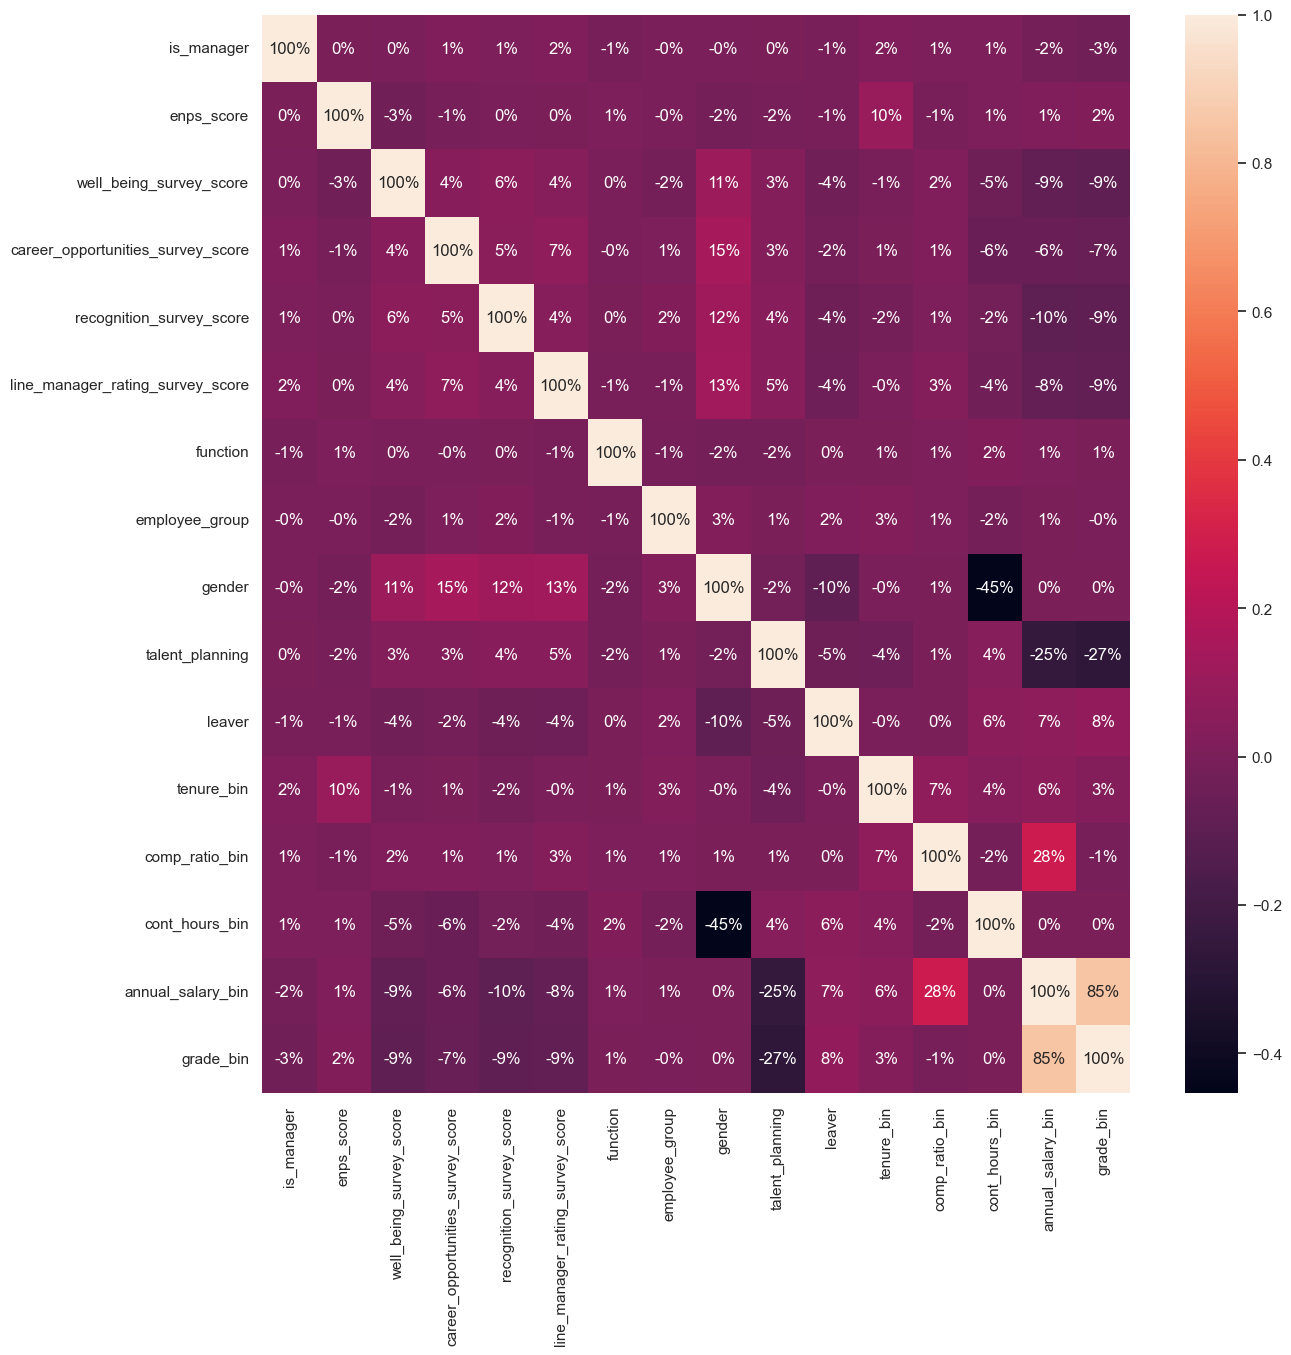

In [22]:
# Draw the heatmap to assess immediate correlations of data from "high potential" talent planning people.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(clean_df.corr(), annot=True, fmt='.0%')

Weak Negative Relationships:  
-Talent Planning -> Annual Salary, Grade

Moderate Negative Relationship:  
-Cont. Hours -> Gender

Weak positive Relationships:  
-Survey Scores -> Gender
-eNPS Score -> Tenure

Not in scope:  
-Comp. Ratio -> Annual Salary


Since the first and only noteworthy correlation is between contracted hours and gender this might present a significant bias that will be tested in the following steps.

In [33]:
dict(enumerate(df['grade_bin'].astype('category').cat.categories))

{0: Interval(0, 5, closed='right'),
 1: Interval(5, 10, closed='right'),
 2: Interval(10, 15, closed='right'),
 3: Interval(15, 20, closed='right'),
 4: Interval(20, 25, closed='right')}

<AxesSubplot:xlabel='Count', ylabel='grade_bin'>

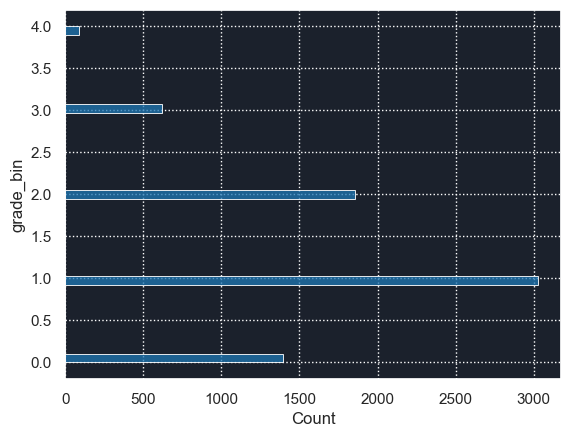

In [35]:
sns.histplot(data=clean_df, y='grade_bin', palette=sns.color_palette(flatui))

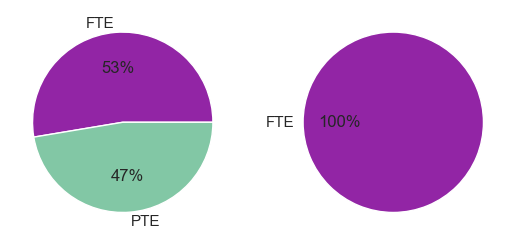

In [37]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="cont_hours_bin").count()['is_manager'],
    labels=["FTE","PTE"],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="cont_hours_bin").count()['is_manager'],
    labels=["FTE"],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

In [ ]:
clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==0) & (clean_df['gender']==1) & (clean_df['cont_hours_bin']==1)]

<AxesSubplot:xlabel='tenure', ylabel='leaver'>

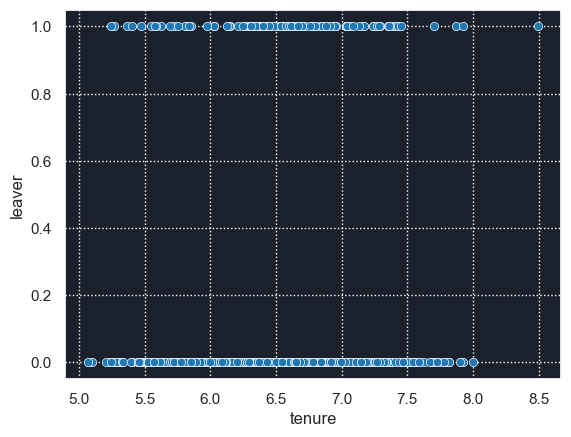

In [38]:
sns.scatterplot(data=df[(df['tenure']<20) & (df['talent_planning'] == "High Potentials")], x="tenure", y='leaver')

The biggest concentration of people resides in the grades categoreies:
1: 5-10 
2: 10-15
3: 15-20

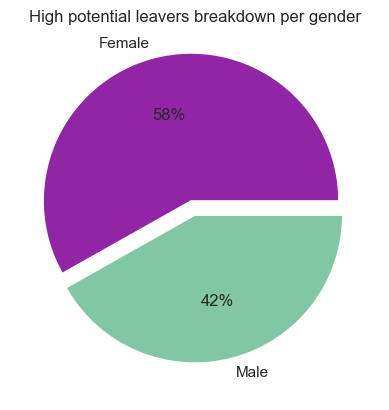

In [40]:
explode = [0.1, 0]
plt.pie(
    [
        len(clean_df[(clean_df['gender']==0) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
        len(clean_df[(clean_df['gender']==1) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
    ],
    labels=["Female","Male"],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%',
    explode = explode
)
plt.title("High potential leavers breakdown per gender")
plt.show()

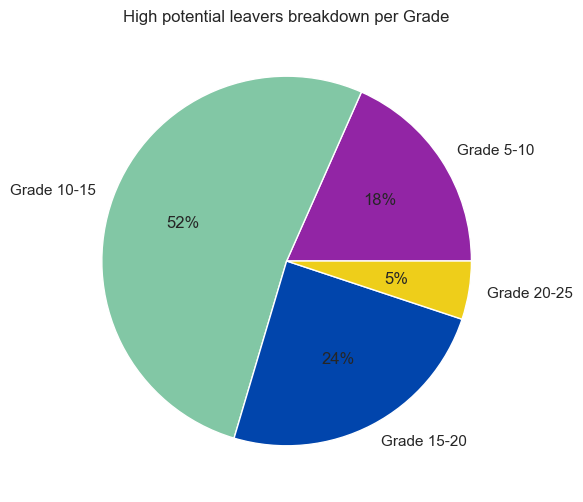

In [112]:
explode = [0.1, 0]
plt.pie(
    [
        len(clean_df[(clean_df['grade_bin']==1) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
        len(clean_df[(clean_df['grade_bin']==2) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
        len(clean_df[(clean_df['grade_bin']==3) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
        len(clean_df[(clean_df['grade_bin']==4) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
    ],
    labels=["Grade 5-10","Grade 10-15","Grade 15-20","Grade 20-25",],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)
plt.title("High potential leavers breakdown per Grade")
plt.show()

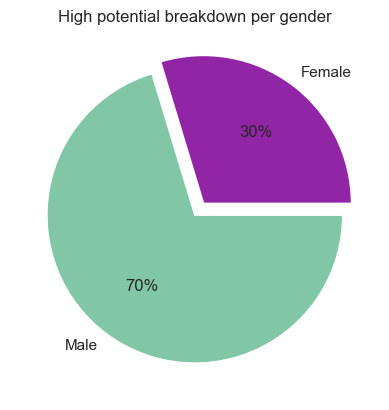

In [42]:
explode = [0.1, 0]
plt.pie(
    [
        len(clean_df[(clean_df['gender']==0) & (clean_df['talent_planning']==0)]),
        len(clean_df[(clean_df['gender']==1) & (clean_df['talent_planning']==0)]),
    ],
    labels=["Female","Male"],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%',
    explode = explode
)
plt.title("High potential breakdown per gender")
plt.show()

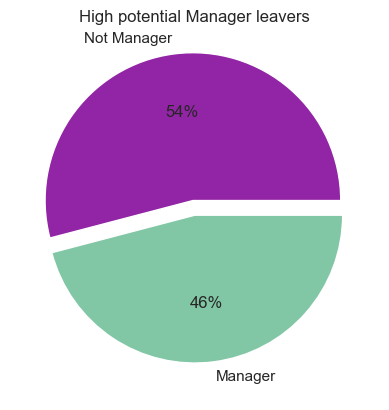

In [43]:
explode = [0.1, 0]
plt.pie(
    [
        len(clean_df[(clean_df['is_manager']==0) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
        len(clean_df[(clean_df['is_manager']==1) & (clean_df['talent_planning']==0) & (clean_df['leaver']==1)]),
    ],
    labels=["Not Manager","Manager"],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%',
    explode = explode
)
plt.title("High potential Manager leavers")
plt.show()

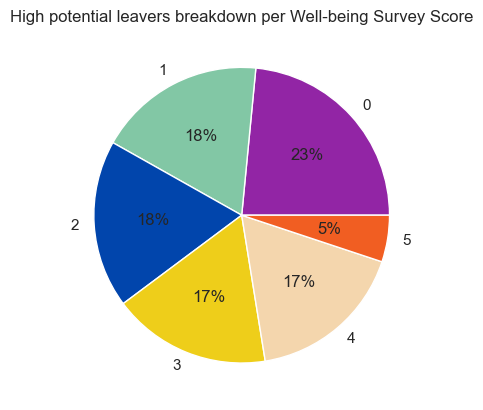

In [46]:
explode = [0.1, 0]
plt.pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1)].groupby(by="well_being_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1)].groupby(by="well_being_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)
plt.title("High potential leavers breakdown per Well-being Survey Score")
plt.show()

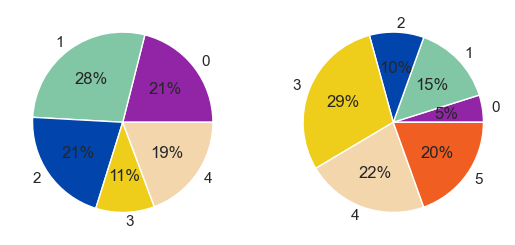

In [48]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="career_opportunities_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="career_opportunities_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="career_opportunities_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="career_opportunities_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

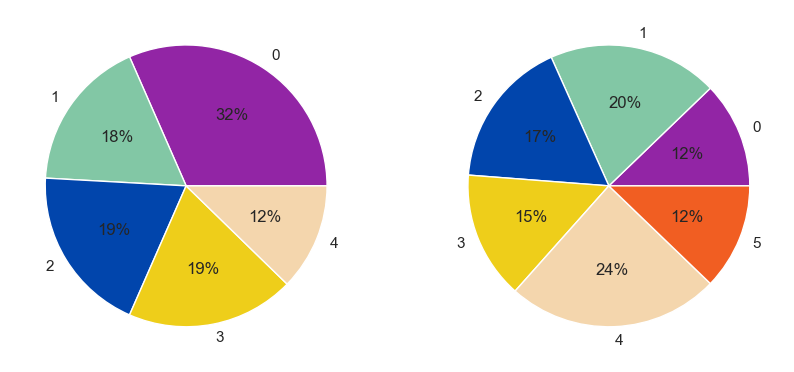

In [104]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="well_being_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="well_being_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="well_being_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="well_being_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

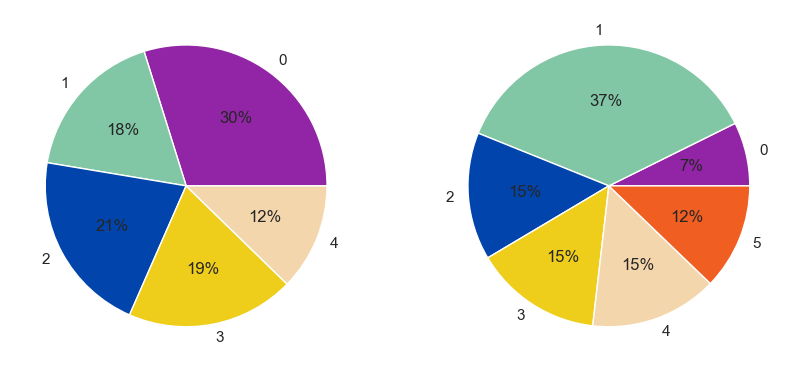

In [105]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="line_manager_rating_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="line_manager_rating_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="line_manager_rating_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="line_manager_rating_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

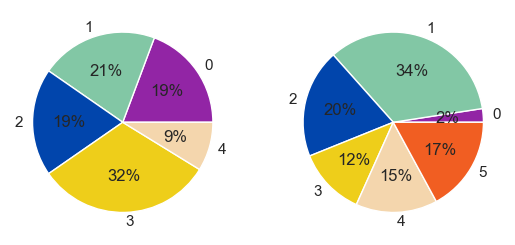

In [49]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="recognition_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="recognition_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="recognition_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="recognition_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

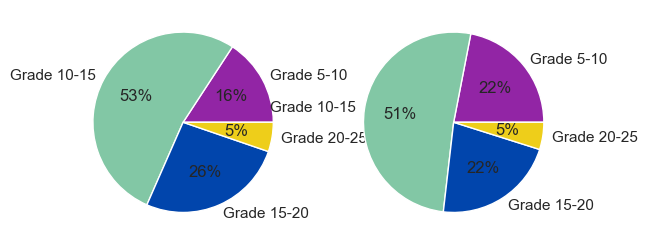

In [50]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==0)].groupby(by="grade_bin").count()['is_manager'],
    labels=["Grade 5-10","Grade 10-15", "Grade 15-20", "Grade 20-25"],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['gender']==1)].groupby(by="grade_bin").count()['is_manager'],
    labels=["Grade 5-10","Grade 10-15", "Grade 15-20", "Grade 20-25"],
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

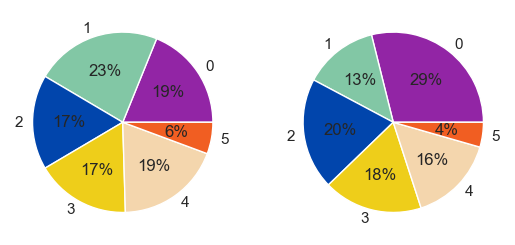

In [51]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="well_being_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="well_being_survey_score").count().index,
    colors =  sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="well_being_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="well_being_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

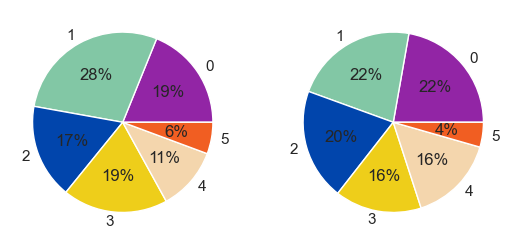

In [52]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="line_manager_rating_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="line_manager_rating_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="line_manager_rating_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="line_manager_rating_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

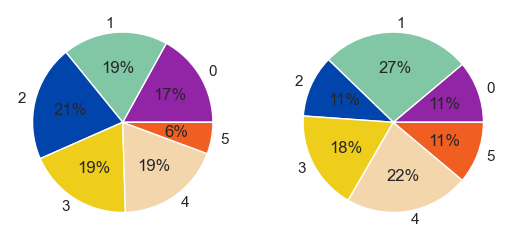

In [53]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="career_opportunities_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="career_opportunities_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="career_opportunities_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="career_opportunities_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

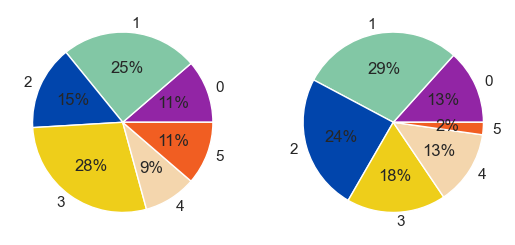

In [54]:
explode = [0.1, 0]
fig, ax = plt.subplots(1, 2)

ax[0].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="recognition_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==0)].groupby(by="recognition_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)



ax[1].pie(
    clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="recognition_survey_score").count()['is_manager'],
    labels=clean_df[(clean_df['talent_planning']==0) & (clean_df['leaver']==1) & (clean_df['is_manager']==1)].groupby(by="recognition_survey_score").count().index,
    colors = sns.color_palette(flatui),
    autopct = '%0.0f%%'
)

plt.show()

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Leaver", "Male", "Female", "is Manager", "Other", "Grade 5-10", "Grade 10-15", "Grade 15-20"]
    ##            0         1        2         3            4        5               6               7
    ),
    link = dict(
      source = [0, 0, 0,1,2,1,2,1,2,1,2,1,2,3,3,3],
      target = [1, 1, 2,3,3,4,4,5,5,6,6,7,7,5,6,7],
      value = [0, 424, 363,178,131,246,232,165,129,128, 124,41,60, 123,99,35]
  ))])

fig.update_layout(title_text="Employee Turnover (Leavers Only)", font_size=12)
fig.show()

In [55]:
sub_leaver = clean_df
print(f"Out of {len(sub_leaver)} Employees that left:")
print(' ')
print(f"{len(sub_leaver[sub_leaver['is_manager'] == 1])} are Managers")
print(f"{len(sub_leaver[sub_leaver['is_manager'] == 0])} are not Managers")
print(' ')
print(f"{len(sub_leaver[sub_leaver['gender'] == 1])} in company are male")
print(f"{len(sub_leaver[sub_leaver['gender'] == 0])} in company are female")
print(' ')
print(f"{len(sub_leaver[(sub_leaver['gender'] == 0) & (sub_leaver['is_manager'] == 1)])} in company are female managers")
print(f"{len(sub_leaver[(sub_leaver['gender'] == 1) & (sub_leaver['is_manager'] == 1)])} in company are male managers")
print(' ')
print(f"{len(sub_leaver[(sub_leaver['gender'] == 0) & (sub_leaver['is_manager'] == 0)])} in company are not female managers")
print(f"{len(sub_leaver[(sub_leaver['gender'] == 1) & (sub_leaver['is_manager'] == 0)])} in company are not male managers")
print(' ')
print(f"{len(sub_leaver[(sub_leaver['gender'] == 0) & (sub_leaver['grade_bin'] == 1)])} are females in grade 1")
print(f"{len(sub_leaver[(sub_leaver['gender'] == 0) & (sub_leaver['grade_bin'] == 2)])} are females in grade 2")
print(f"{len(sub_leaver[(sub_leaver['gender'] == 0) & (sub_leaver['grade_bin'] == 3)])} are females in grade 3")
print(f"{len(sub_leaver[(sub_leaver['gender'] == 1) & (sub_leaver['grade_bin'] == 1)])} are males in grade 1")
print(f"{len(sub_leaver[(sub_leaver['gender'] == 1) & (sub_leaver['grade_bin'] == 2)])} are males in grade 2")
print(f"{len(sub_leaver[(sub_leaver['gender'] == 1) & (sub_leaver['grade_bin'] == 3)])} are males in grade 3")
print(' ')
print(f"{len(sub_leaver[(sub_leaver['grade_bin'] == 1) & (sub_leaver['is_manager'] == 1)])} are manager in grade 1")
print(f"{len(sub_leaver[(sub_leaver['grade_bin'] == 2) & (sub_leaver['is_manager'] == 1)])} are manager in grade 2")
print(f"{len(sub_leaver[(sub_leaver['grade_bin'] == 3) & (sub_leaver['is_manager'] == 1)])} are manager in grade 3")

Out of 6986 Employees that left:
 
2813 are Managers
4173 are not Managers
 
4645 in company are male
2341 in company are female
 
947 in company are female managers
1866 in company are male managers
 
1394 in company are not female managers
2779 in company are not male managers
 
971 are females in grade 1
639 are females in grade 2
211 are females in grade 3
2054 are males in grade 1
1219 are males in grade 2
408 are males in grade 3
 
1187 are manager in grade 1
730 are manager in grade 2
239 are manager in grade 3


<AxesSubplot:>

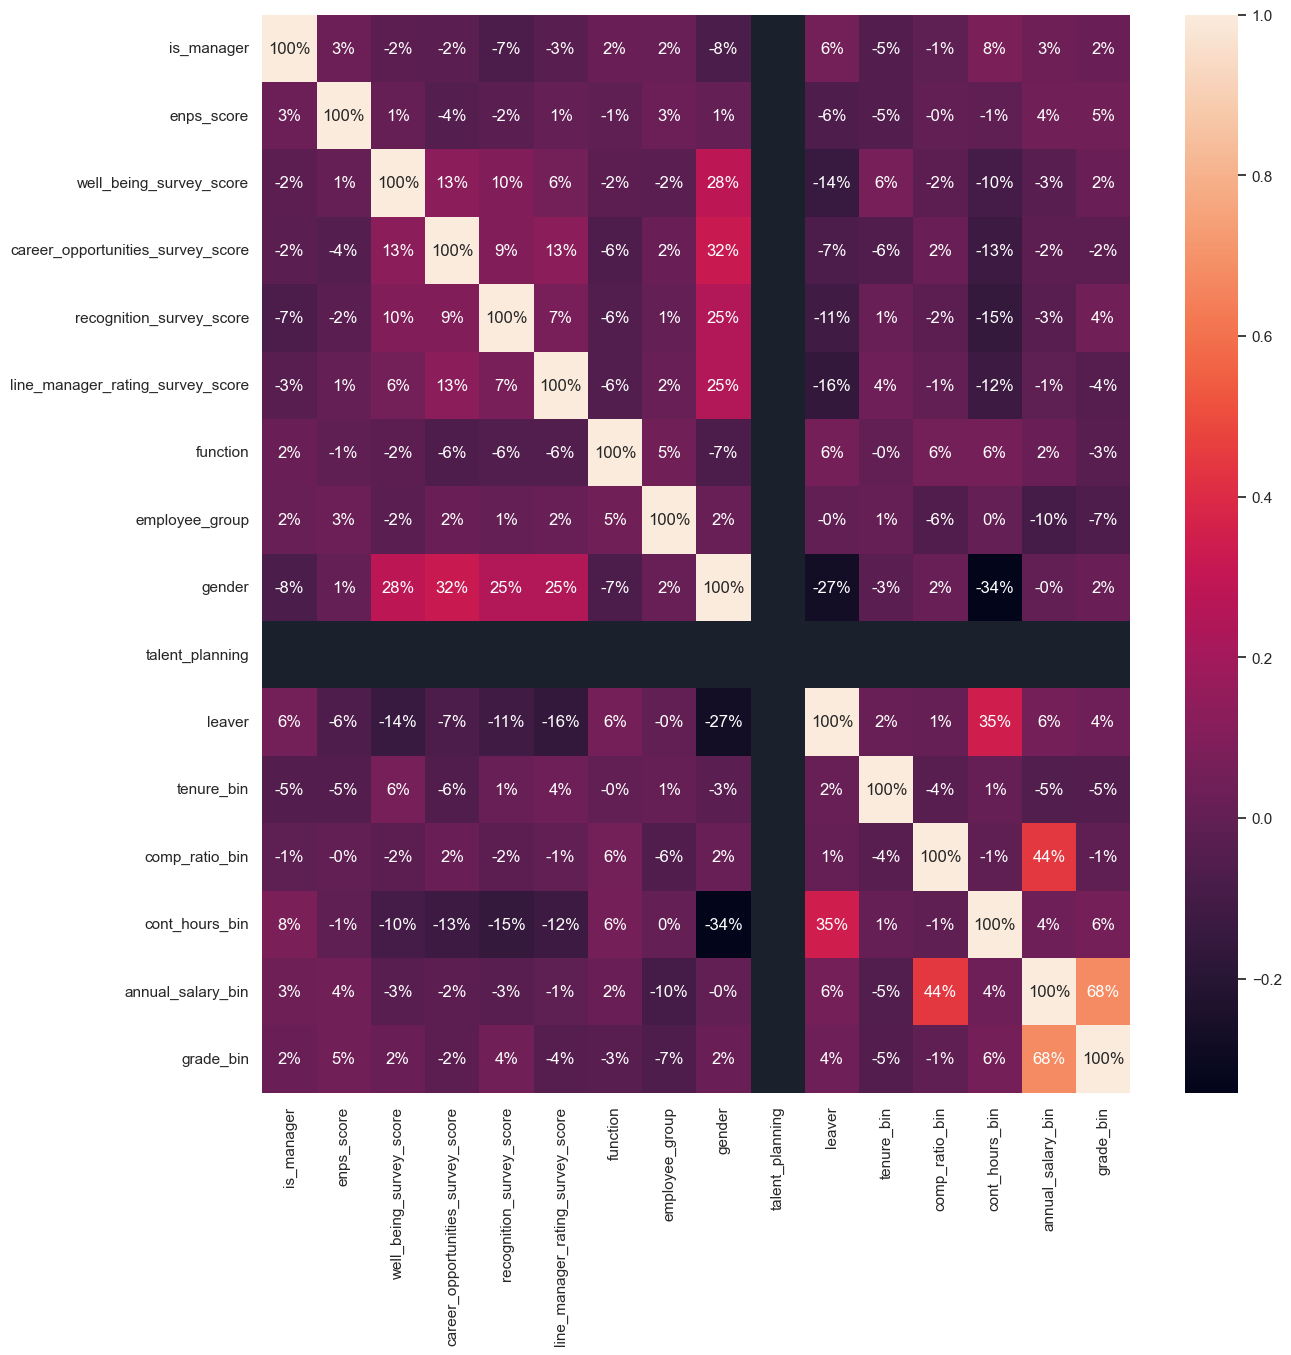

In [56]:
# Draw the heatmap to assess immediate correlations of data from "high potential" talent planning people.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(clean_df[clean_df['talent_planning'] == 0].corr(), annot=True, fmt='.0%')

In [ ]:
recat_df.head(1)

In [57]:
# Draw the heatmap to assess immediate correlations of data
sub_talent = recat_df[recat_df['talent_planning']==1]
sub_talent.head(2)

,is_manager,enps_score,well_being_survey_score,career_opportunities_survey_score,recognition_survey_score,line_manager_rating_survey_score,function,employee_group,gender,talent_planning,leaver,tenure_bin,comp_ratio_bin,cont_hours_bin,annual_salary_bin,grade_bin
0,1,7,5,4,4,4,5,1,0,1,1,4,0,0,1,0
1,1,6,4,3,4,1,7,1,1,1,0,4,1,0,2,1


In [58]:
sub_talent_leaver = recat_df[(recat_df['talent_planning']==1) & (recat_df['leaver']==True)]

In [60]:
sub_talent.drop(['talent_planning'], axis=1, inplace=True)
sub_talent.head(2)

C:\Users\cram9\AppData\Local\Temp\ipykernel_14196\3254680177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_talent.drop(['talent_planning'], axis=1, inplace=True)


,is_manager,enps_score,well_being_survey_score,career_opportunities_survey_score,recognition_survey_score,line_manager_rating_survey_score,function,employee_group,gender,leaver,tenure_bin,comp_ratio_bin,cont_hours_bin,annual_salary_bin,grade_bin
0,1,7,5,4,4,4,5,1,0,1,4,0,0,1,0
1,1,6,4,3,4,1,7,1,1,0,4,1,0,2,1


In [61]:
sub_talent_leaver.drop(['talent_planning', 'leaver'], axis=1, inplace=True)
sub_talent_leaver.head(2)

C:\Users\cram9\AppData\Local\Temp\ipykernel_14196\1963081684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_talent_leaver.drop(['talent_planning', 'leaver'], axis=1, inplace=True)


,is_manager,enps_score,well_being_survey_score,career_opportunities_survey_score,recognition_survey_score,line_manager_rating_survey_score,function,employee_group,gender,tenure_bin,comp_ratio_bin,cont_hours_bin,annual_salary_bin,grade_bin
0,1,7,5,4,4,4,5,1,0,4,0,0,1,0
27,0,6,4,2,1,5,3,1,1,4,1,0,2,1


<AxesSubplot:>

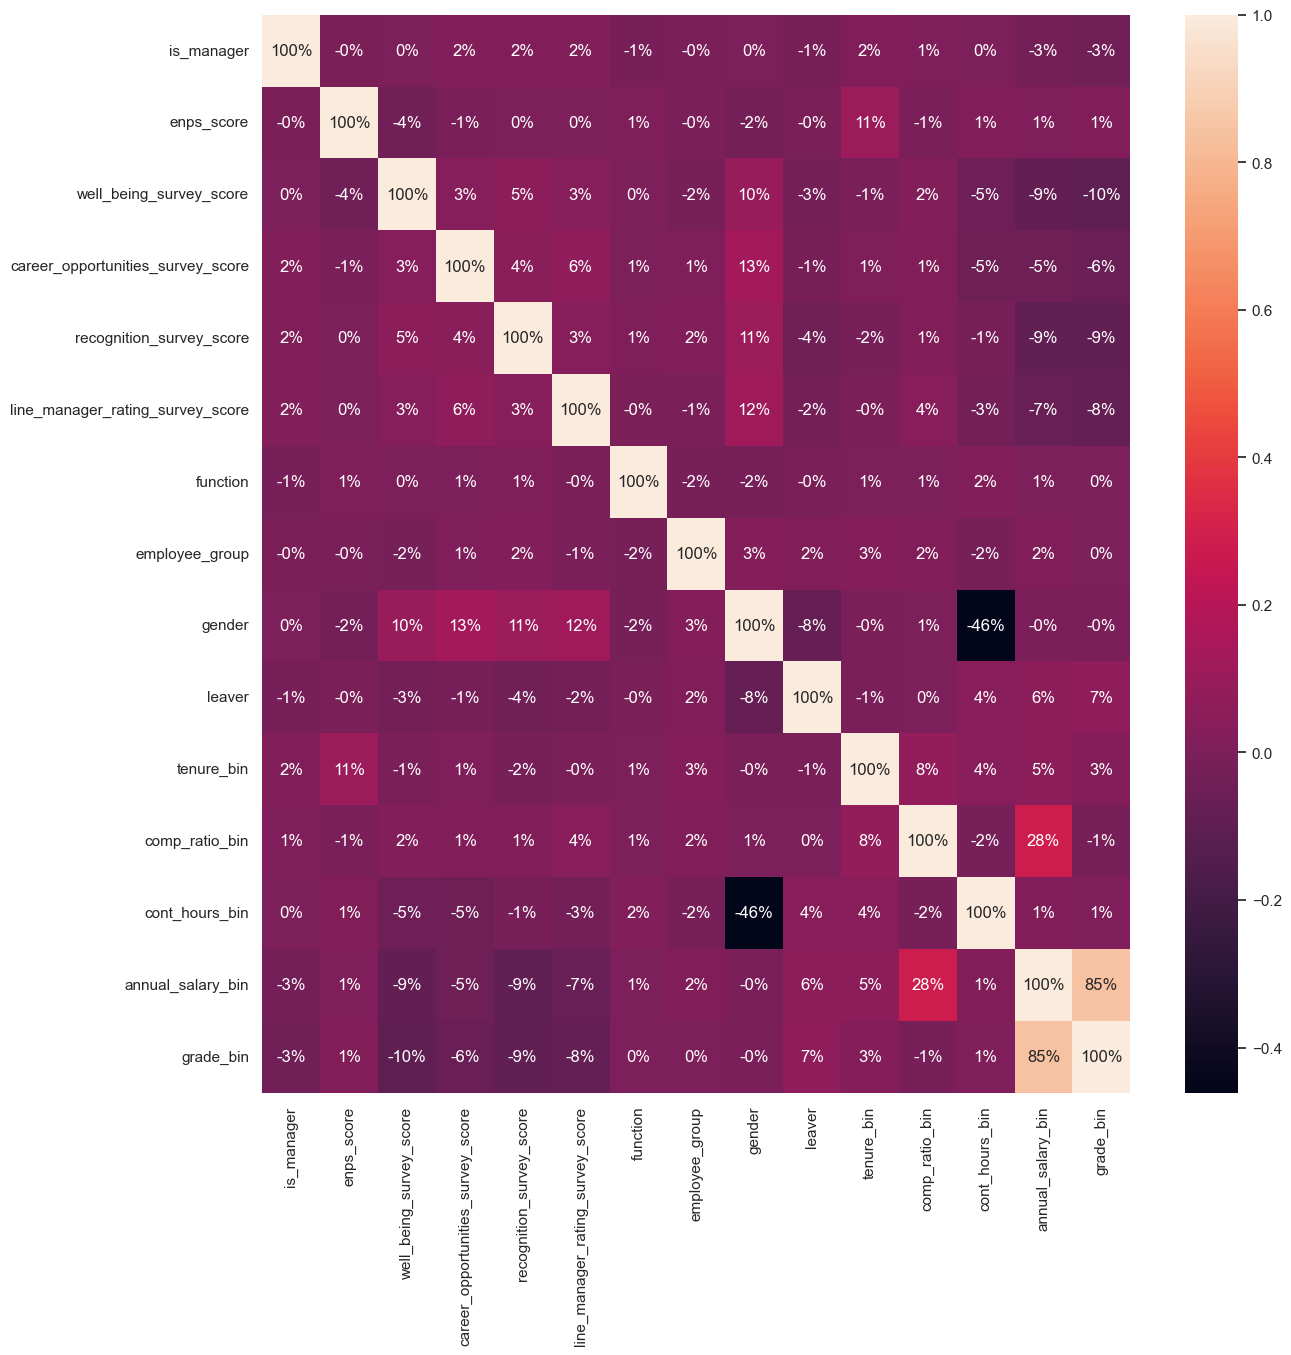

In [62]:
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(sub_talent.corr(), annot=True, fmt='.0%')

<AxesSubplot:xlabel='career_opportunities_survey_score', ylabel='recognition_survey_score'>

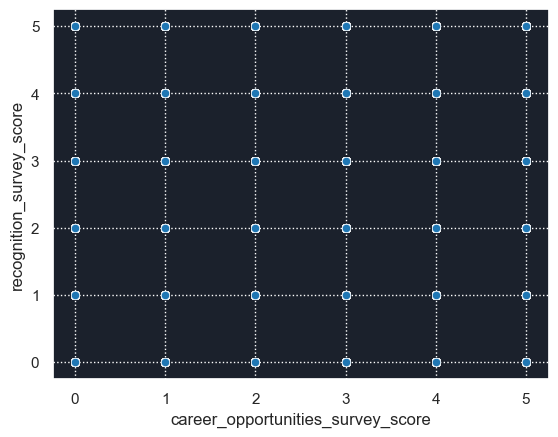

In [64]:
sns.scatterplot(data=sub_talent, x="career_opportunities_survey_score", y="recognition_survey_score")

As expected, there are almost three time more males as females with 35 contractual hours (full-time).  
On the other side, there are significantly more females with part-time (less than 35 contracted hours).  

The bias here is sustained, female people might be engaged in other activities outside of the company while male people would treat the job as a main source of occupancy.

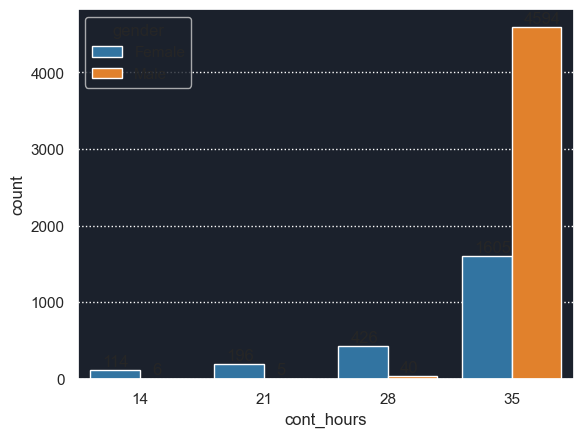

In [65]:
cont_hours_per_gender = sns.countplot(data=df, x='cont_hours', hue="gender")

for p in cont_hours_per_gender.patches:
        cont_hours_per_gender.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

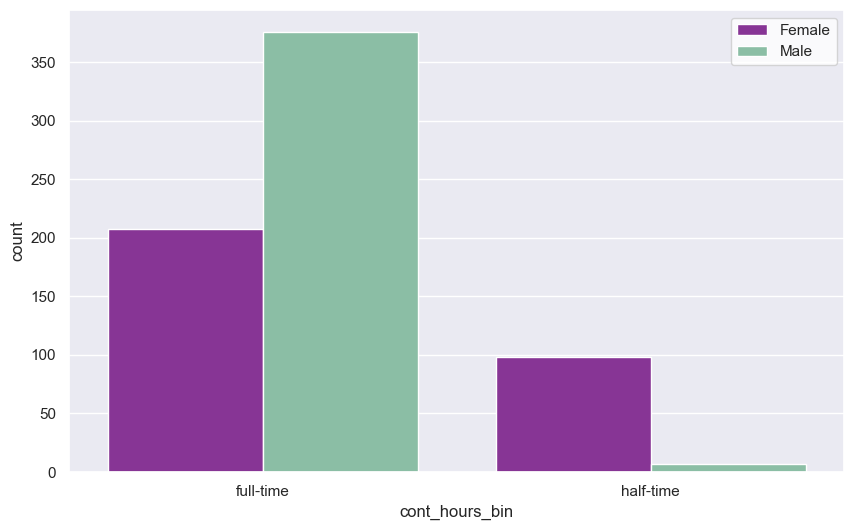

In [122]:
cont_hours_per_gender = sns.countplot(
    data= df[(df['leaver']==True) & (df['talent_planning']==0)],
    x='cont_hours_bin',
    hue="gender",
    palette=sns.color_palette(flatui)
)
plt.legend().get_frame().set_facecolor('white')
# for p in cont_hours_per_gender.patches:
#         cont_hours_per_gender.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

In [119]:
df

,employee_id,tenure,grade,comp_ratio,cont_hours,annual_salary,hourly_rate,actual_weekly_pay,time_in_latest_role,commute,...,nationality,race,sexuality,talent_planning,leaver,tenure_bin,comp_ratio_bin,cont_hours_bin,annual_salary_bin,grade_bin
0,1,6.465675,5,0.86,35,13760.0,7.560440,264.615385,6.465675,5.7,...,Indonesia,Asian,Heterosexual,0,True,tested,fraction,full-time,"(10000.0, 20000.0]","(0, 5]"
1,2,6.337260,7,1.11,35,22311.0,12.258791,257.434615,3.600000,16.4,...,Other,Other,Heterosexual,0,False,tested,multiple,full-time,"(20000.0, 30000.0]","(5, 10]"
2,3,6.073610,2,1.18,35,11210.0,6.159341,215.576923,1.300000,35.6,...,Russian Fed.,White,Prefer not to say,0,False,tested,multiple,full-time,"(10000.0, 20000.0]","(0, 5]"
3,4,5.739302,14,0.83,35,28593.5,15.710714,549.875000,0.900000,17.8,...,Indonesia,Asian,Prefer not to say,1,False,tested,fraction,full-time,"(20000.0, 30000.0]","(10, 15]"
4,5,6.549916,9,1.22,35,29524.0,16.221978,567.769231,5.400000,4.8,...,Italy,Arab,Non-heterosexual,0,False,tested,multiple,full-time,"(20000.0, 30000.0]","(5, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,7176,5.605769,9,0.75,35,18150.0,9.972527,349.038462,5.500000,24.5,...,Other,Other,Prefer not to say,0,False,tested,fraction,full-time,"(10000.0, 20000.0]","(5, 10]"
7176,7177,6.201016,6,0.87,28,15703.5,8.628297,241.592308,5.600000,25.6,...,Philippines,Asian,Heterosexual,0,False,tested,fraction,half-time,"(10000.0, 20000.0]","(5, 10]"
7177,7178,5.916340,7,0.75,35,15075.0,8.282967,289.903846,5.916340,17.1,...,Brazil,White,Heterosexual,0,False,tested,fraction,full-time,"(10000.0, 20000.0]","(5, 10]"
7178,7179,6.490140,8,1.13,35,25029.5,13.752473,481.336538,1.700000,8.7,...,Switzerland,White,Heterosexual,0,False,tested,multiple,full-time,"(20000.0, 30000.0]","(5, 10]"


In [70]:
recat_df[recat_df.columns[1:]].corr()['leaver'][:]

enps_score                          -0.007235
well_being_survey_score             -0.038412
career_opportunities_survey_score   -0.021239
recognition_survey_score            -0.044790
line_manager_rating_survey_score    -0.040878
function                             0.004914
employee_group                       0.015281
gender                              -0.095222
talent_planning                     -0.048477
leaver                               1.000000
tenure_bin                          -0.002564
comp_ratio_bin                       0.002597
cont_hours_bin                       0.062063
annual_salary_bin                    0.066504
grade_bin                            0.076254
Name: leaver, dtype: float64

<AxesSubplot:>

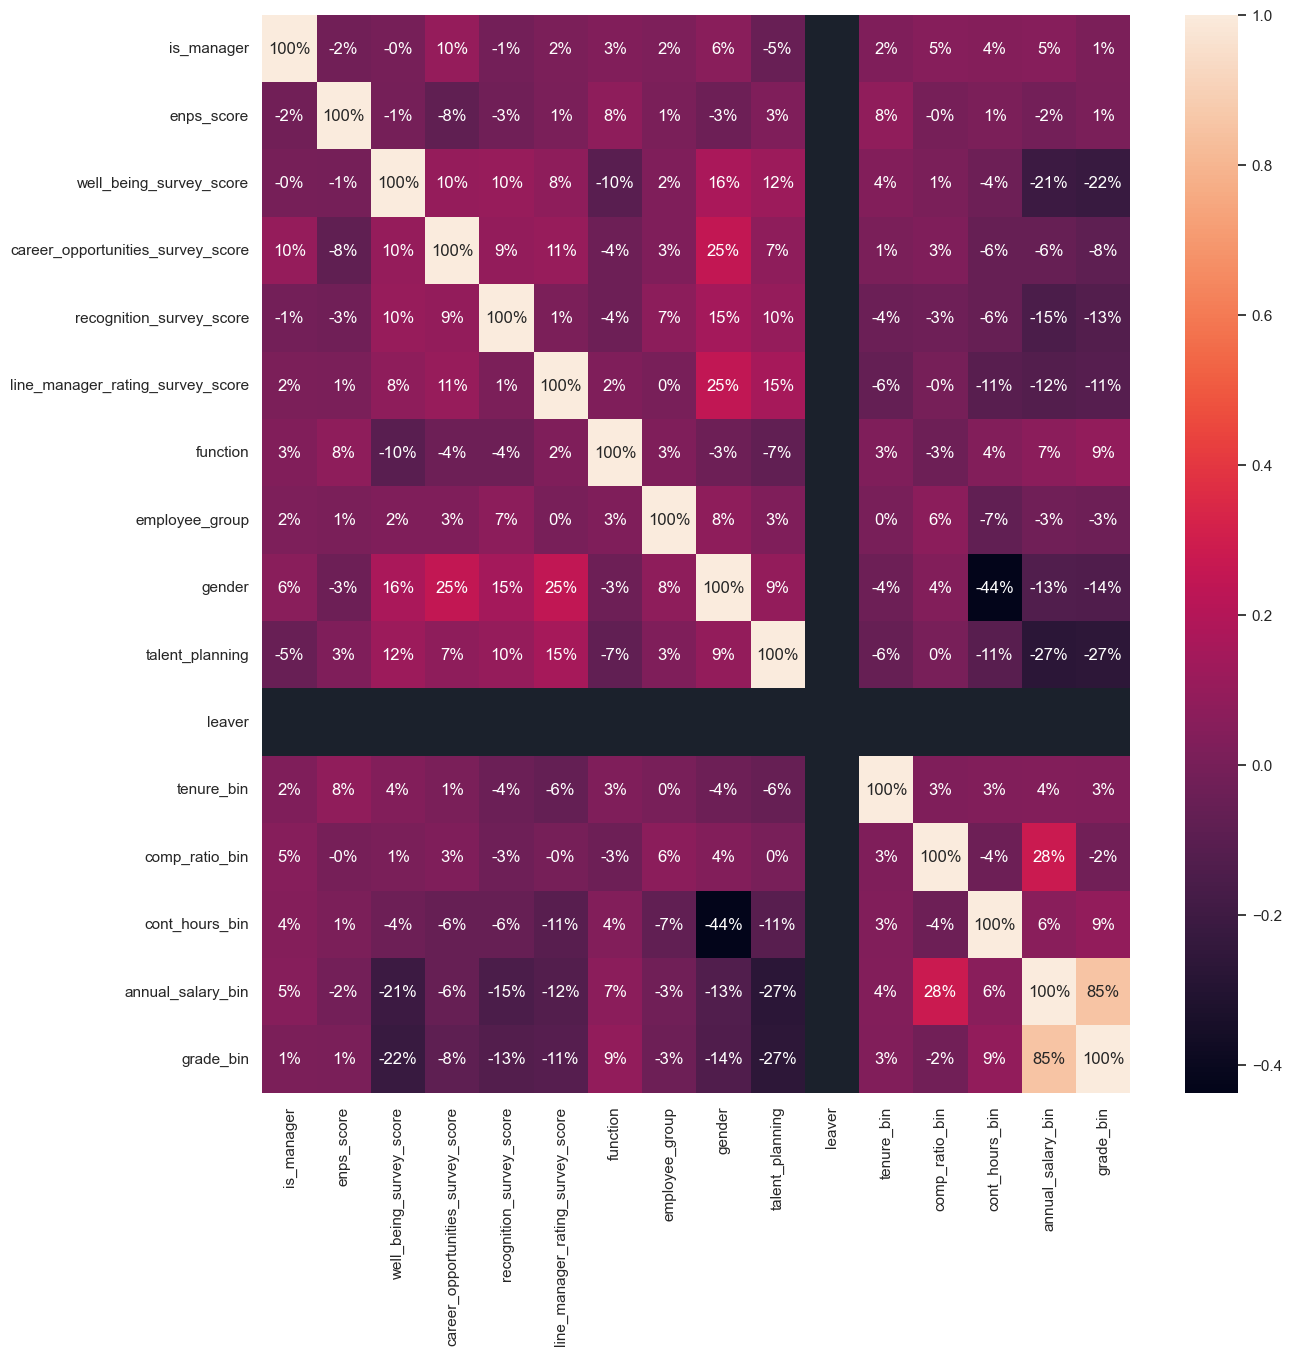

In [71]:
# Draw the heatmap to assess immediate correlations of leaver data
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(recat_df[recat_df['leaver']==1].corr(), annot=True, fmt='.0%')

It looks like High potential employees can only be identified as having a grade 10 at minimum.

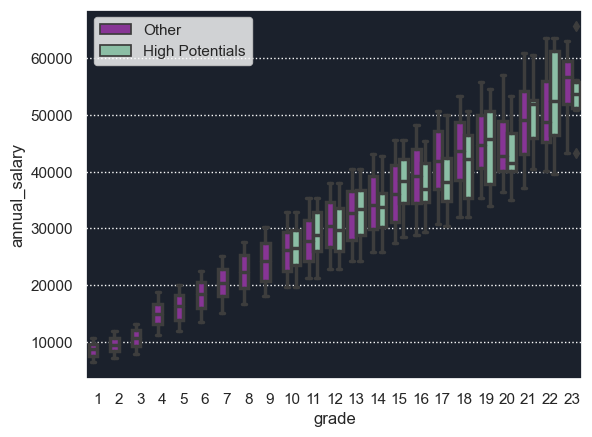

In [74]:
sns.boxplot(
    data=df,
    x='grade',
    y='annual_salary',
    hue='talent_planning',
    palette=sns.color_palette(flatui)
)
plt.legend().get_frame().set_facecolor('white')

In [75]:
subset_leaver = df[df['leaver'] == True]
subset_talent = df[df['talent_planning'] == 'High Potentials']
subset_talent_leaver = df[(df['talent_planning'] == 'High Potentials') & (df['leaver'] == True)]

In the following chart, a comparison of grade and annual salary dimensioned by leaver status of high potential people is shown. 
It is evident that although high potential people are proportionatelly compensated, there certain grade groups where compensation might not be the main reason of retention, specially on the following grade groups (since the leaver "candles" are bigger than their counterparts:
- 10
- 13
- 19

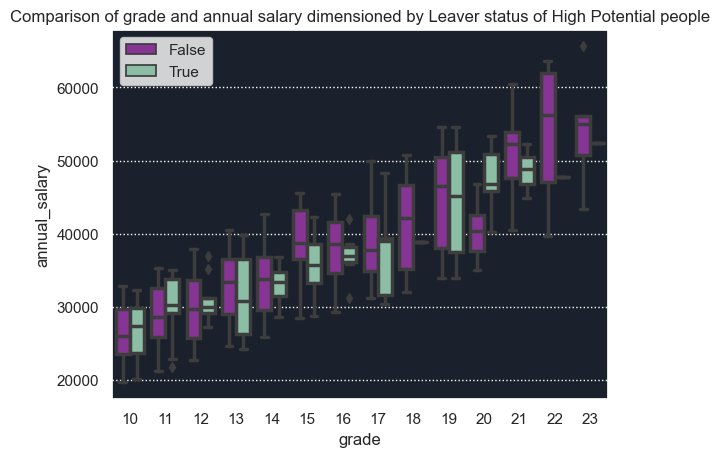

In [76]:
sns.boxplot(
    data=subset_talent,
    x='grade',
    y='annual_salary',
    hue='leaver',
    palette=sns.color_palette(flatui)
).set(title="Comparison of grade and annual salary dimensioned by Leaver status of High Potential people")
plt.legend().get_frame().set_facecolor('white')

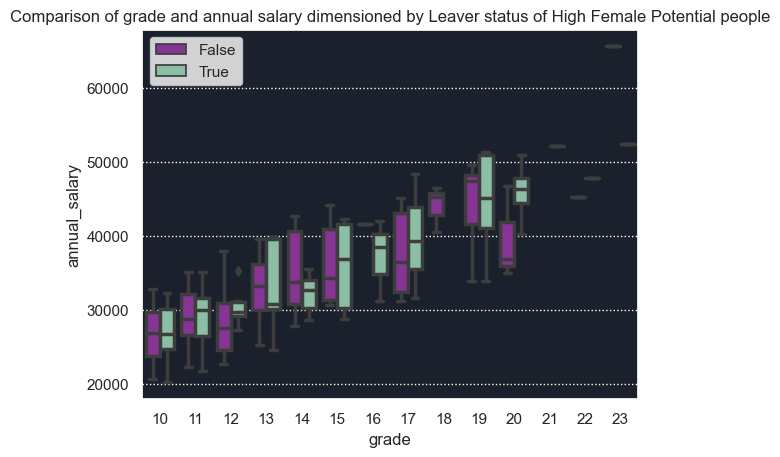

In [77]:
sns.boxplot(
    data=subset_talent[subset_talent['gender']=="Female"],
    x='grade',
    y='annual_salary',
    hue='leaver',
    palette=sns.color_palette(flatui)
).set(title="Comparison of grade and annual salary dimensioned by Leaver status of High Female Potential people")
plt.legend().get_frame().set_facecolor('white')

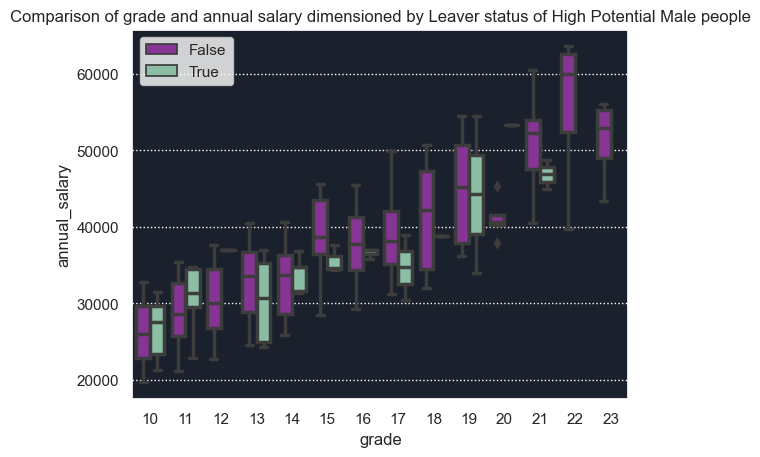

In [78]:
sns.boxplot(
    data=subset_talent[subset_talent['gender']=="Male"],
    x='grade',
    y='annual_salary',
    hue='leaver',
    palette=sns.color_palette(flatui)
).set(title="Comparison of grade and annual salary dimensioned by Leaver status of High Potential Male people")
plt.legend().get_frame().set_facecolor('white')

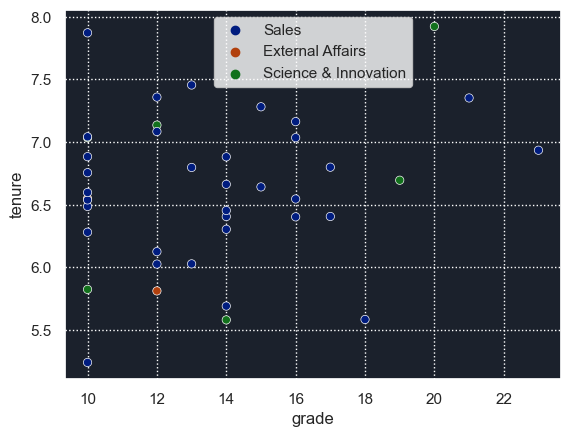

In [80]:
sns.scatterplot(
    data=subset_talent_leaver[subset_talent_leaver['function'].isin(['Sales', 'Science & Innovation', 'External Affairs'])],
    x='grade',
    y='tenure',
    hue='function',
    palette="dark"
)
plt.legend().get_frame().set_facecolor('white')

In the following graph, data from high potential people that have left the company is overlayed on the data representing people leaving the company and aggregated as a percentage segregated by function.

It is evident that the *Sales* and *Operations* departments have high turnover rates.
This could mean a couple of things:
- A different strategy was taken by the business that lead to a possible downsizing
- The industry focus or scope might be changing
- Bases of operations could have had a political altercation (since the leaver value as percentage is higher than the talent leaver value)
- High potential employees working in Sales have the highest turnover rate. A deeper dive on the topic might show further insights on why high potential sales employees have left the company.
- Another noteworthy outlier is the Science & Innovation department that also has a higher turnover rate than the general leaver population.

Out of this analysis and for simplicity sake, a focus Operations, Sales and Science & Innovation functions is going to be further applied.

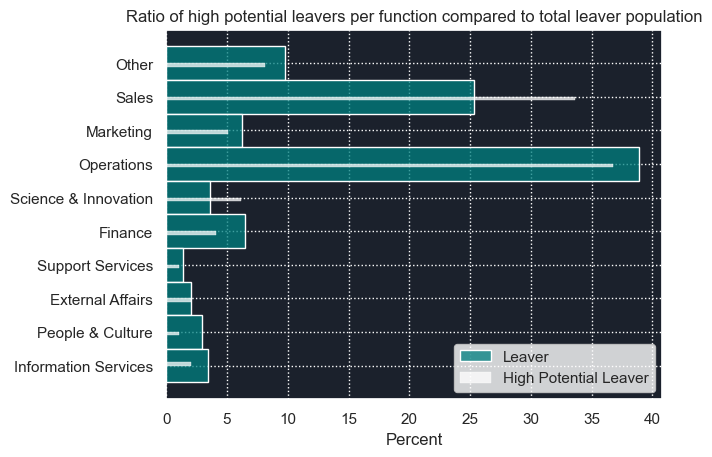

In [83]:
sns.histplot(
    data=subset_leaver,
    y="function",
    label="Leaver",
    color="teal",
    stat='percent',
    discrete=True
).set(ylabel=None)
sns.histplot(
    data=subset_talent_leaver,
    y="function",
    label="High Potential Leaver",
    color="white",
    stat='percent',
    discrete=False,
    binwidth=0.1
).set(
    title='Ratio of high potential leavers per function compared to total leaver population',
    ylabel=None)
plt.legend().get_frame().set_facecolor('white')

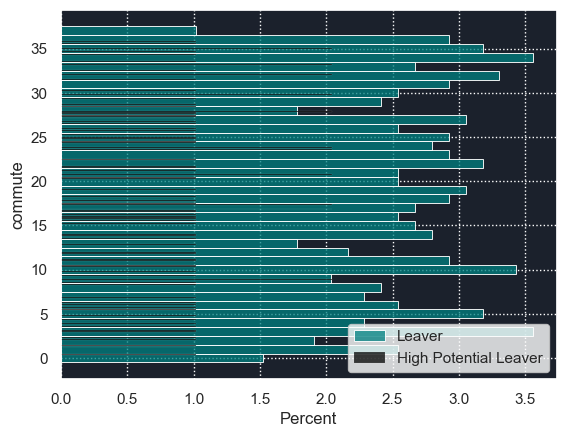

In [84]:
sns.histplot(
    data=subset_leaver,
    y="commute",
    label="Leaver",
    color="teal",
    stat='percent',
    discrete=True
).set(ylabel=None)
sns.histplot(
    data=subset_talent_leaver,
    y="commute",
    label="High Potential Leaver",
    color="black",
    stat='percent',
    discrete=False,
    binwidth=0.1
)
plt.legend().get_frame().set_facecolor('white')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

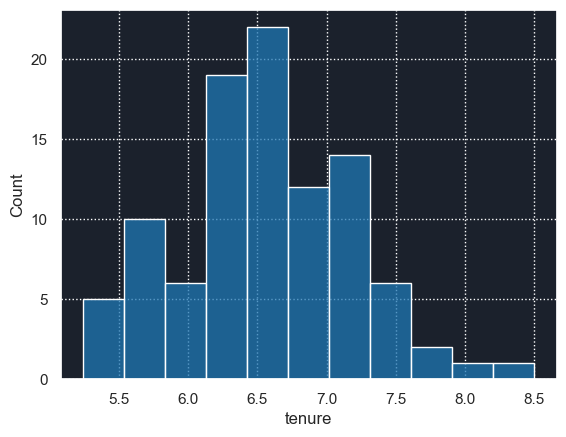

In [85]:
# Attrition by tenure
sns.histplot(data=subset_talent_leaver, x='tenure')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

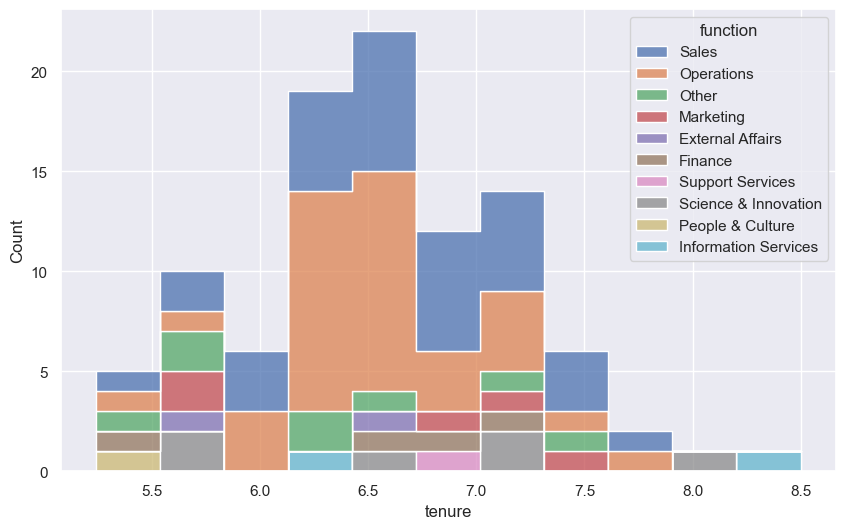

In [86]:
# Attrition by Tenure and Function
sns.set(rc={"figure.figsize":(10, 6)})
sns.histplot(data=subset_talent_leaver, x='tenure', hue="function", multiple="stack", element="step")

From the immediate data frame information, out of `7180` entries `7180` have non-null values. No further corrections of this aspect needs to be done.

On a study done<a name="HelloTeam"></a>[<sup>[1]</sup>](https://www.helloteam.com/turnover-rates-by-industry/) in 2021 the average turnover rate in the US is 47.2%

${Turnover Rate(\%)}=\frac{\#Separations}{Avg.\#Employees}*{100}$

It seems that having only `11.2%` turnover is not significant compared to global reports.  
Scoping down on Top Talent the shows a 16.37% rate, although higher, still around the norm.

In [92]:
print('Total ' + str(len(df)))
print('Total High Potentials ' + str(len(df[df.talent_planning == "High Potentials"])))
print('Leavers ' + str(len(df[df.leaver == True])))
print('High potential Leavers ' + str(len(subset_talent[subset_talent.leaver == True])))

print('Yearly turnover rate from initial data is: %.2f%%' % (len(df[df.leaver == True]) / len(df) * 100))
print('Yearly High Potentials reported: %.2f%%' % (len(df[df.talent_planning == "High Potentials"]) / len(df) * 100))
print('Yearly turnover rate of Top talents: %.2f%%' % (len(subset_talent[subset_talent.leaver == True]) / len(subset_talent) * 100))

Total 6986
Total High Potentials 603
Leavers 787
High potential Leavers 98
Yearly turnover rate from initial data is: 11.27%
Yearly High Potentials reported: 8.63%
Yearly turnover rate of Top talents: 16.25%


In [88]:
df['tenure'] = df['tenure'].apply(lambda x: abs(x))
df['time_in_latest_role'] = df['time_in_latest_role'].apply(lambda x: abs(x))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,6986.0,3586.181220,2072.226173,1.000000,1794.250000,3571.500000,5383.750000,7180.000000
tenure,6986.0,6.362331,2.353836,0.020000,5.790272,6.197828,6.615245,49.910000
grade,6986.0,9.287289,4.555086,1.000000,6.000000,9.000000,12.000000,23.000000
comp_ratio,6986.0,1.004021,0.146977,0.750000,0.880000,1.000000,1.130000,1.250000
cont_hours,6986.0,33.769539,3.869247,14.000000,35.000000,35.000000,35.000000,35.000000
annual_salary,6986.0,24878.510378,10095.591183,6375.000000,17941.500000,23700.500000,30847.000000,65596.000000
hourly_rate,6986.0,13.669511,5.547028,3.502747,9.857967,13.022253,16.948901,36.041758
actual_weekly_pay,6986.0,430.921752,195.811093,51.653846,286.846154,409.596154,550.218750,1261.461538
time_in_latest_role,6986.0,4.545297,3.271915,0.000000,1.800000,5.576969,6.331885,49.850000
commute,6986.0,18.395563,10.696953,0.000000,9.225000,18.200000,27.700000,36.700000


In [93]:
# With Pearson Correlation Coefficient
df.corrwith(df.leaver)

employee_id                         -0.006699
tenure                               0.030865
grade                                0.076827
comp_ratio                           0.001065
cont_hours                          -0.052966
annual_salary                        0.072025
hourly_rate                          0.072025
actual_weekly_pay                    0.065343
time_in_latest_role                  0.024551
commute                              0.014158
direct_reports                      -0.010084
is_manager                          -0.007289
enps_score                          -0.007235
well_being_survey_score             -0.038412
career_opportunities_survey_score   -0.021239
recognition_survey_score            -0.044790
line_manager_rating_survey_score    -0.040878
leaver                               1.000000
dtype: float64

By correlating the "Talent planning" 

In [94]:
# assign boolean "Talent Planning" feature
df['talent_planning'] = df['talent_planning'].apply(lambda x: 1 if x=='High Potentials' else 0)
df.corrwith(df.talent_planning)

employee_id                         -0.003572
tenure                               0.024816
grade                                0.284445
comp_ratio                          -0.008583
cont_hours                           0.043340
annual_salary                        0.258700
hourly_rate                          0.258700
actual_weekly_pay                    0.240268
time_in_latest_role                  0.007146
commute                              0.009344
direct_reports                       0.007622
is_manager                          -0.002916
enps_score                           0.015878
well_being_survey_score             -0.031151
career_opportunities_survey_score   -0.029711
recognition_survey_score            -0.042428
line_manager_rating_survey_score    -0.046105
talent_planning                      1.000000
leaver                               0.048477
dtype: float64

<AxesSubplot:>

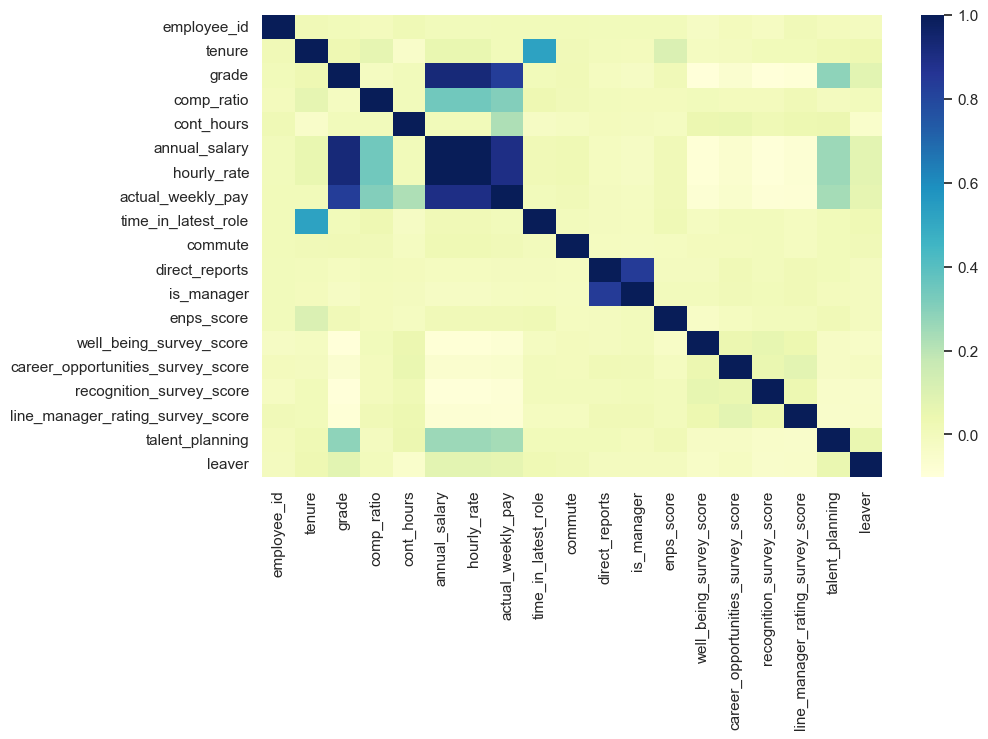

In [95]:
sns.heatmap(df.corr(), cmap="YlGnBu")

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [96]:
print(f"Out of {len(df)} Employees:")
print(f"{len(df[df['gender'] == 'Male'])} in company are male")
print(f"{len(df[df['gender'] == 'Female'])} in company are female")
print(f"{len(subset_leaver[subset_leaver['gender']=='Male'])} leavers were male")
print(f"{len(subset_leaver[subset_leaver['gender']=='Female'])} leavers were female")

Out of 6986 Employees:
4645 in company are male
2341 in company are female
424 leavers were male
363 leavers were female


In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Leaver", "Male", "Female"],
      color =  ['black', 'blue', 'pink']
    ),
    link = dict(
      source = [0, 0, 0],
      target = [1, 1, 2],
      value = [0, 434, 370],
      color =  ['white', 'blue', 'pink']
  ))])

fig.update_layout(title_text="Employee Turnover", font_size=12)
fig.show()

From the info property of this dataset it is evident that there are no Null values present in the dataset.

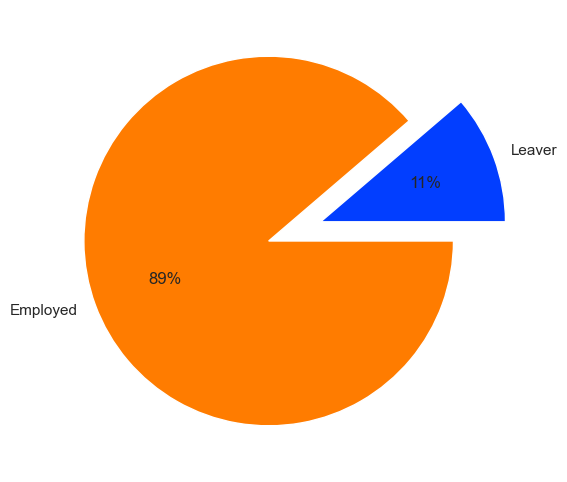

In [97]:
data = [
    len(df[df['leaver'] == True]),
    len(df[df['leaver'] == False]),
]
labels = ['Leaver', 'Employed']
explode = [0.3, 0]
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

In [ ]:
print(f"Out of {len(df['leaver'])} Employees:")
print(f"{len(df[df['leaver'] == True])} have left the company")
print(f"{len(df[df['leaver'] == False])} are still employed")

In [ ]:
print(f"Out of {len(subset_leaver)} Employees that left:")
print(f"{len(subset_leaver[subset_leaver['gender'] == 'Male'])} were male")
print(f"{len(subset_leaver[subset_leaver['gender'] == 'Female'])} were female")

In [ ]:
print(f"Out of {len(subset_leaver)} Employees that left:")
print(f"{len(subset_leaver[subset_leaver['talent_planning'] == 'High Potentials'])} were High Potentials")
print(f"{len(subset_leaver[subset_leaver['talent_planning'] == 'Other'])} were not High Potentials")

In [ ]:
sns.histplot(data=df[df['leaver']==True], y='function')

In [ ]:
sns.histplot(data=df[df['leaver']==True], y='country')

In [ ]:
sns.histplot(data=df[df['leaver']==True], y='employee_group')

In [ ]:
sns.histplot(data=df[df['leaver']==True], y='nationality')

In [ ]:
sns.histplot(data=df[df['leaver']==True], y='race')

In [ ]:
sns.histplot(data=df[df['leaver']==True], y='sexuality')

In [ ]:
sns.histplot(data=df[df['leaver']==True], y='talent_planning')

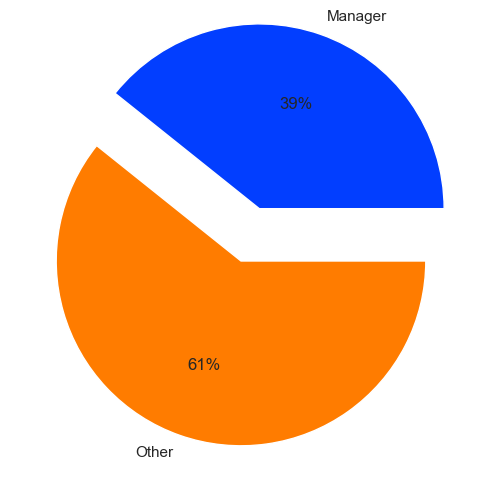

In [98]:
data = [
    len(subset_leaver[subset_leaver['is_manager'] == 1]),
    len(subset_leaver[subset_leaver['is_manager'] == 0]),
]
labels = ['Manager', 'Other']
explode = [0.3, 0]
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

In [ ]:
subset_leaver.describe().T

In [ ]:
sns.histplot(data=df[df['Leaver']==True], y='Grade', stat="count", bins=23)
plt.yticks(df[df['Leaver']==True]['Grade'].unique())

In [ ]:
subset_talent.describe().T

In [ ]:
clean_df.head()

## Leaver Prediction with Random Forest
***

In [ ]:
# Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder
recat_df = clean_df

In [ ]:
recat_df.head()

In [ ]:
# swap columns
cols = list(recat_df.columns)
a, b = cols.index('is_manager'), cols.index('leaver')
cols[b], cols[a] = cols[a], cols[b]
recat_df = recat_df[cols]
recat_df

In [ ]:
# feature dropped recat
fdr = recat_df
fdr

In [ ]:
# split data to enable training
X = fdr.iloc[:, 1:fdr.shape[1]].values
Y = fdr.iloc[:, 0].values

In [ ]:
# Split data 75% training / 25 % testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [ ]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, Y_train)

In [ ]:
# Get accuracy on training dataset 
forest.score(X_train, Y_train)

In [ ]:
# Get the confusion matrix and accuracy scores for model on test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, forest.predict(X_test))

# True Negative
TN = cm[0][0]

# True Positive
TP = cm[1][1]

# False Negative
FN = cm[1][0]

# False Positive
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy = {}'.format( (TP+TN) / (TP+TN+FN+FP) ))


In [ ]:
# Get existing leaver value to try the random forest classifier
existing_leaver_value = np.delete(fdr.iloc[0].values, 0)
existing_leaver_value

In [ ]:
# And the result is positive, it checks out with the data
forest.predict(existing_leaver_value.reshape(1, -1))

In [ ]:
forest.predict_proba(existing_leaver_value.reshape(1, -1))

In [ ]:
fdr.iloc[0]

In [ ]:
# fictitious person
fic_person = np.array([[
    10, # enps_score
    2, # well_being_survey_score
    1, # career_opportunities_survey_score
    4, # recognition_survey_score
    0, # line_manager_survey_score
    7, # function
    1, # employee_group
    0, # gender
    0, # talent_planning
    0, # is_manager
    4, # tenure_bin
    0, # comp_ratio_bin
    0, # cont_hours_bin
    3, # annual_salary_bin
    2, # grade_bin
]])
forest.predict_proba(fic_person)

In [ ]:
forest.predict(fic_person)

>48% of businesses say their high-quality hires come from employee referrals.<a name="smallbizgenius"></a>[<sup>[Z]</sup>](https://www.smallbizgenius.net/by-the-numbers/recruitment-statistics/)  
-Linkedin

In [ ]:
forest.decision_path(fic_person)